### Generate Results plots and tables

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [8]:
def get_convergence(df1):
    converged = []
    temp_df = df1.groupby(['iter'])['overall_train_auc'].agg({"overall_train_auc": "mean"}).reset_index()
    converged_iters = 0
    prev_test_loss = None
    iter_num = 0
    for index, row in temp_df.iterrows():
        iter_num += 1
        if prev_test_loss == None:
            prev_test_loss = row['overall_train_auc']
            continue
        if iter_num % 10 == 0 and iter_num > 10:
            if abs(row['overall_train_auc'] - prev_test_loss) < 0.001:
                converged.append(row['iter'])
                break
            prev_test_loss = row['overall_train_auc']
    return converged

In [10]:
col = 'overall_test_auc'

In [11]:
all_dfs = []
centralized_dfs = []
distributed_dfs = []

dataset_names = []
cent_auc_mean = []
cent_auc_std = []
dist_auc_mean = []
dist_auc_std = []
cent_iters_mean = []
cent_iters_std = []
dist_iters_mean = []
dist_iters_std = []

for dataset in ['arcene', 'dexter', 'gisette', 'madelon', 'HT', 'mnist_balanced', 'dorothea_balanced']:
    cent_aucs = []
    dist_aucs = []
    cent_iters = []
    dist_iters = []
    for i in [10,11,12]:
        df_temp = pd.read_csv("{}/results/results_{}.csv".format(dataset, i))
        cent_iters.append(get_convergence(df_temp)[0])

        cent_aucs.append(df_temp.overall_test_auc.max())

    for i in [13,14,15]:
        df_temp = pd.read_csv("{}/results/results_{}.csv".format(dataset, i))
        dist_iters.append(get_convergence(df_temp)[0])

        dist_aucs.append(df_temp.overall_test_auc.max())

    dataset_names.append(dataset)
    cent_auc_mean.append(np.mean(cent_aucs))
    cent_auc_std.append(np.std(cent_aucs))
    dist_auc_mean.append(np.mean(dist_aucs))
    dist_auc_std.append(np.std(dist_aucs))
    cent_iters_mean.append(np.mean(cent_iters))
    cent_iters_std.append(np.std(cent_iters))
    dist_iters_mean.append(np.mean(dist_iters))
    dist_iters_std.append(np.std(dist_iters))


    df1 = pd.read_csv('{}/results/results_10.csv'.format(dataset)).groupby(['iter'])[[col]].mean()

    df2 = pd.read_csv('{}/results/results_11.csv'.format(dataset)).groupby(['iter'])[[col]].mean()

    df3 = pd.read_csv('{}/results/results_12.csv'.format(dataset)).groupby(['iter'])[[col]].mean()



    overall_df1 = df1.merge(
                    df2, on=['iter'], how='inner', suffixes=('', '_'+str(2)))

    overall_df1 = overall_df1.merge(
                    df3, on=['iter'], how='inner', suffixes=('', '_'+str(3)))

    overall_df1
    overall_df1['test_loss_average'] = (overall_df1[col] + overall_df1[col+'_2'] + overall_df1[col+'_3']) / 3.0
    overall_df1.rename(columns={col: col+'_1'}, inplace=True)
    overall_df1['std'] = overall_df1[[col+'_1', col+'_2', col+'_3']].std(axis=1)

    df1 = pd.read_csv('{}/results/results_13.csv'.format(dataset)).groupby(['iter'])[[col]].mean()

    df2 = pd.read_csv('{}/results/results_14.csv'.format(dataset)).groupby(['iter'])[[col]].mean()

    df3 = pd.read_csv('{}/results/results_15.csv'.format(dataset)).groupby(['iter'])[[col]].mean()



    overall_df2 = df1.merge(
                    df2, on=['iter'], how='inner', suffixes=('', '_'+str(2)))

    overall_df2 = overall_df2.merge(
                    df3, on=['iter'], how='inner', suffixes=('', '_'+str(3)))

    overall_df2
    overall_df2['test_loss_average'] = (overall_df2[col] + overall_df2[col+'_2'] + overall_df2[col+'_3']) / 3.0
    overall_df2.rename(columns={col: col+'_1'}, inplace=True)
    overall_df2['std'] = overall_df2[[col+'_1', col+'_2', col+'_3']].std(axis=1)

    overall_df2['overall_test_auc'] = overall_df2.test_loss_average
    overall_df2['overlap_ratio'] = '0'
    distributed_dfs.append(overall_df2.copy())
    
    overall_df1['overall_test_auc'] = overall_df1.test_loss_average
    overall_df1['overlap_ratio'] = 'Centralized'
    centralized_dfs.append(overall_df1.copy())
    df_12 = overall_df2.reset_index()[['iter', 'overall_test_auc', 'overlap_ratio']]

    df_11 = overall_df1.reset_index()[['iter', 'overall_test_auc', 'overlap_ratio']]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
pd.DataFrame(
    {
        'Dataset': dataset_names,
        'Centralized AUC': cent_auc_mean,
        'Centralized AUC STD.': cent_auc_std,
        'Distributed AUC': dist_auc_mean,
        'Distributed AUC STD.': dist_auc_std,
        'Centralized Iterations': cent_iters_mean,
        'Centralized Iterations STD.': cent_iters_std,
        'Distributed Iterations': dist_iters_mean,
        'Distributed Iterations STD.': dist_iters_std
    }
)#.to_csv('table.csv')

,Dataset,Centralized AUC,Centralized AUC STD.,Distributed AUC,Distributed AUC STD.,Centralized Iterations,Centralized Iterations STD.,Distributed Iterations,Distributed Iterations STD.
0,arcene,0.936824,0.002443,0.938447,0.001997,299.000000,16.329932,365.666667,233.285709
1,dexter,0.660778,0.019566,0.853037,0.006531,29.000000,0.000000,29.000000,0.000000
2,gisette,0.989059,0.005046,0.995043,0.000681,155.666667,9.428090,182.333333,4.714045
3,madelon,0.634263,0.010001,0.648041,0.008300,462.333333,73.181661,292.333333,49.216077
4,HT,0.998935,0.001090,0.983763,0.020421,149.000000,65.319726,205.666667,49.888765
5,mnist_balanced,0.997881,0.000191,0.993870,0.000678,209.000000,14.142136,189.000000,16.329932
6,dorothea_balanced,0.922434,0.004316,0.933391,0.010260,42.333333,4.714045,55.666667,4.714045


### Centralized and Distributed MLP

<IPython.core.display.Javascript object>


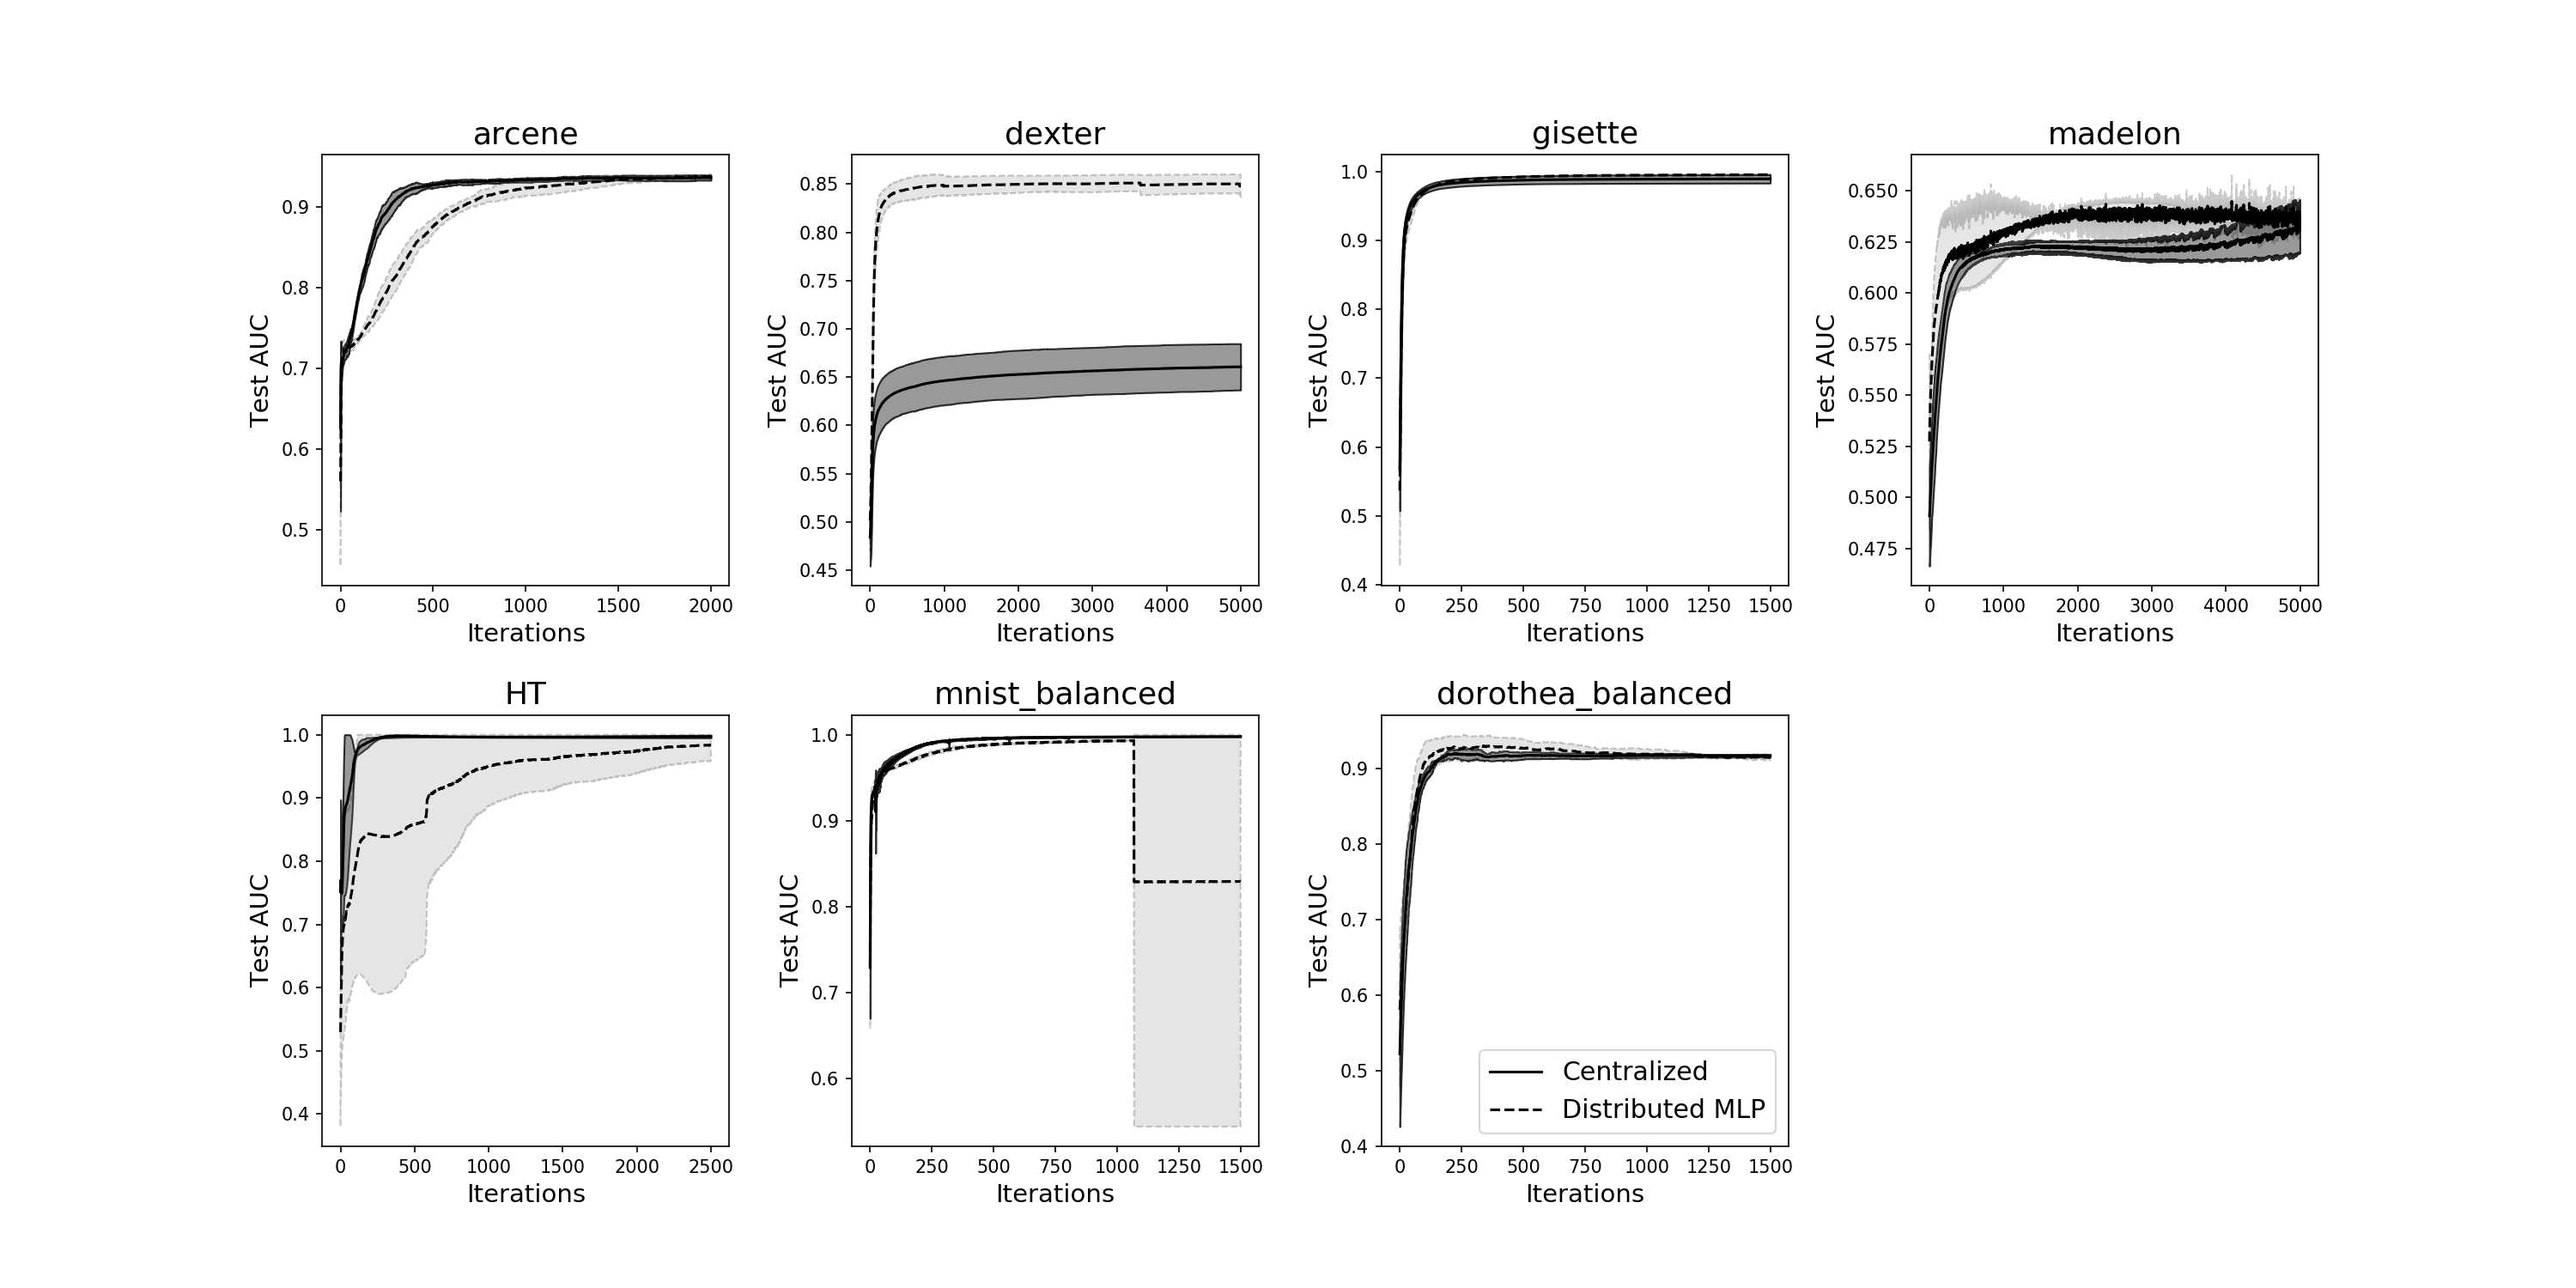

In [13]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.delaxes(ax8)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(len(datasets)):
    
    dataset = datasets[i]
    overall_df1 = centralized_dfs[i]
    overall_df2 = distributed_dfs[i]

    ub = overall_df1.test_loss_average + overall_df1['std']
    ub[ub>1] = 1
    
    axes[i].plot(overall_df1.index, overall_df1.test_loss_average,'k-' , label='Centralized')
    axes[i].fill_between(overall_df1.index, overall_df1.test_loss_average - overall_df1['std'], ub,
                alpha=0.8, facecolor='gray', edgecolor='black',
                linewidth=1, linestyle='-', antialiased=True)

    ub = overall_df2.test_loss_average + overall_df2['std']
    ub[ub>1] = 1
 
    axes[i].plot(overall_df2.index, overall_df2.test_loss_average,'k--' , label='Distributed MLP')
    axes[i].fill_between(overall_df2.index, overall_df2.test_loss_average - overall_df2['std'], ub,
                alpha=0.2, facecolor='gray', edgecolor='black',
                linewidth=1, linestyle='--', antialiased=True)
    axes[i].set_xlabel('Iterations', fontsize=14)
    axes[i].set_ylabel('Test AUC', fontsize=14)
    axes[i].set_title(datasets[i], fontsize='xx-large')
    if i == len(datasets)-1:
        axes[i].legend(loc=4, fontsize='x-large')
    pass

### Overlap Results

In [14]:
datasets =  ['arcene', 'dexter', 'gisette', 'madelon', 'HT', 'mnist_balanced', 'dorothea_balanced']

dataset_names = ['Arcene', 'Dexter', 'Gisette', 'Madelon', 'HT Sensor', 'MNIST Balanced', 'Dorothea Balanced']

<IPython.core.display.Javascript object>


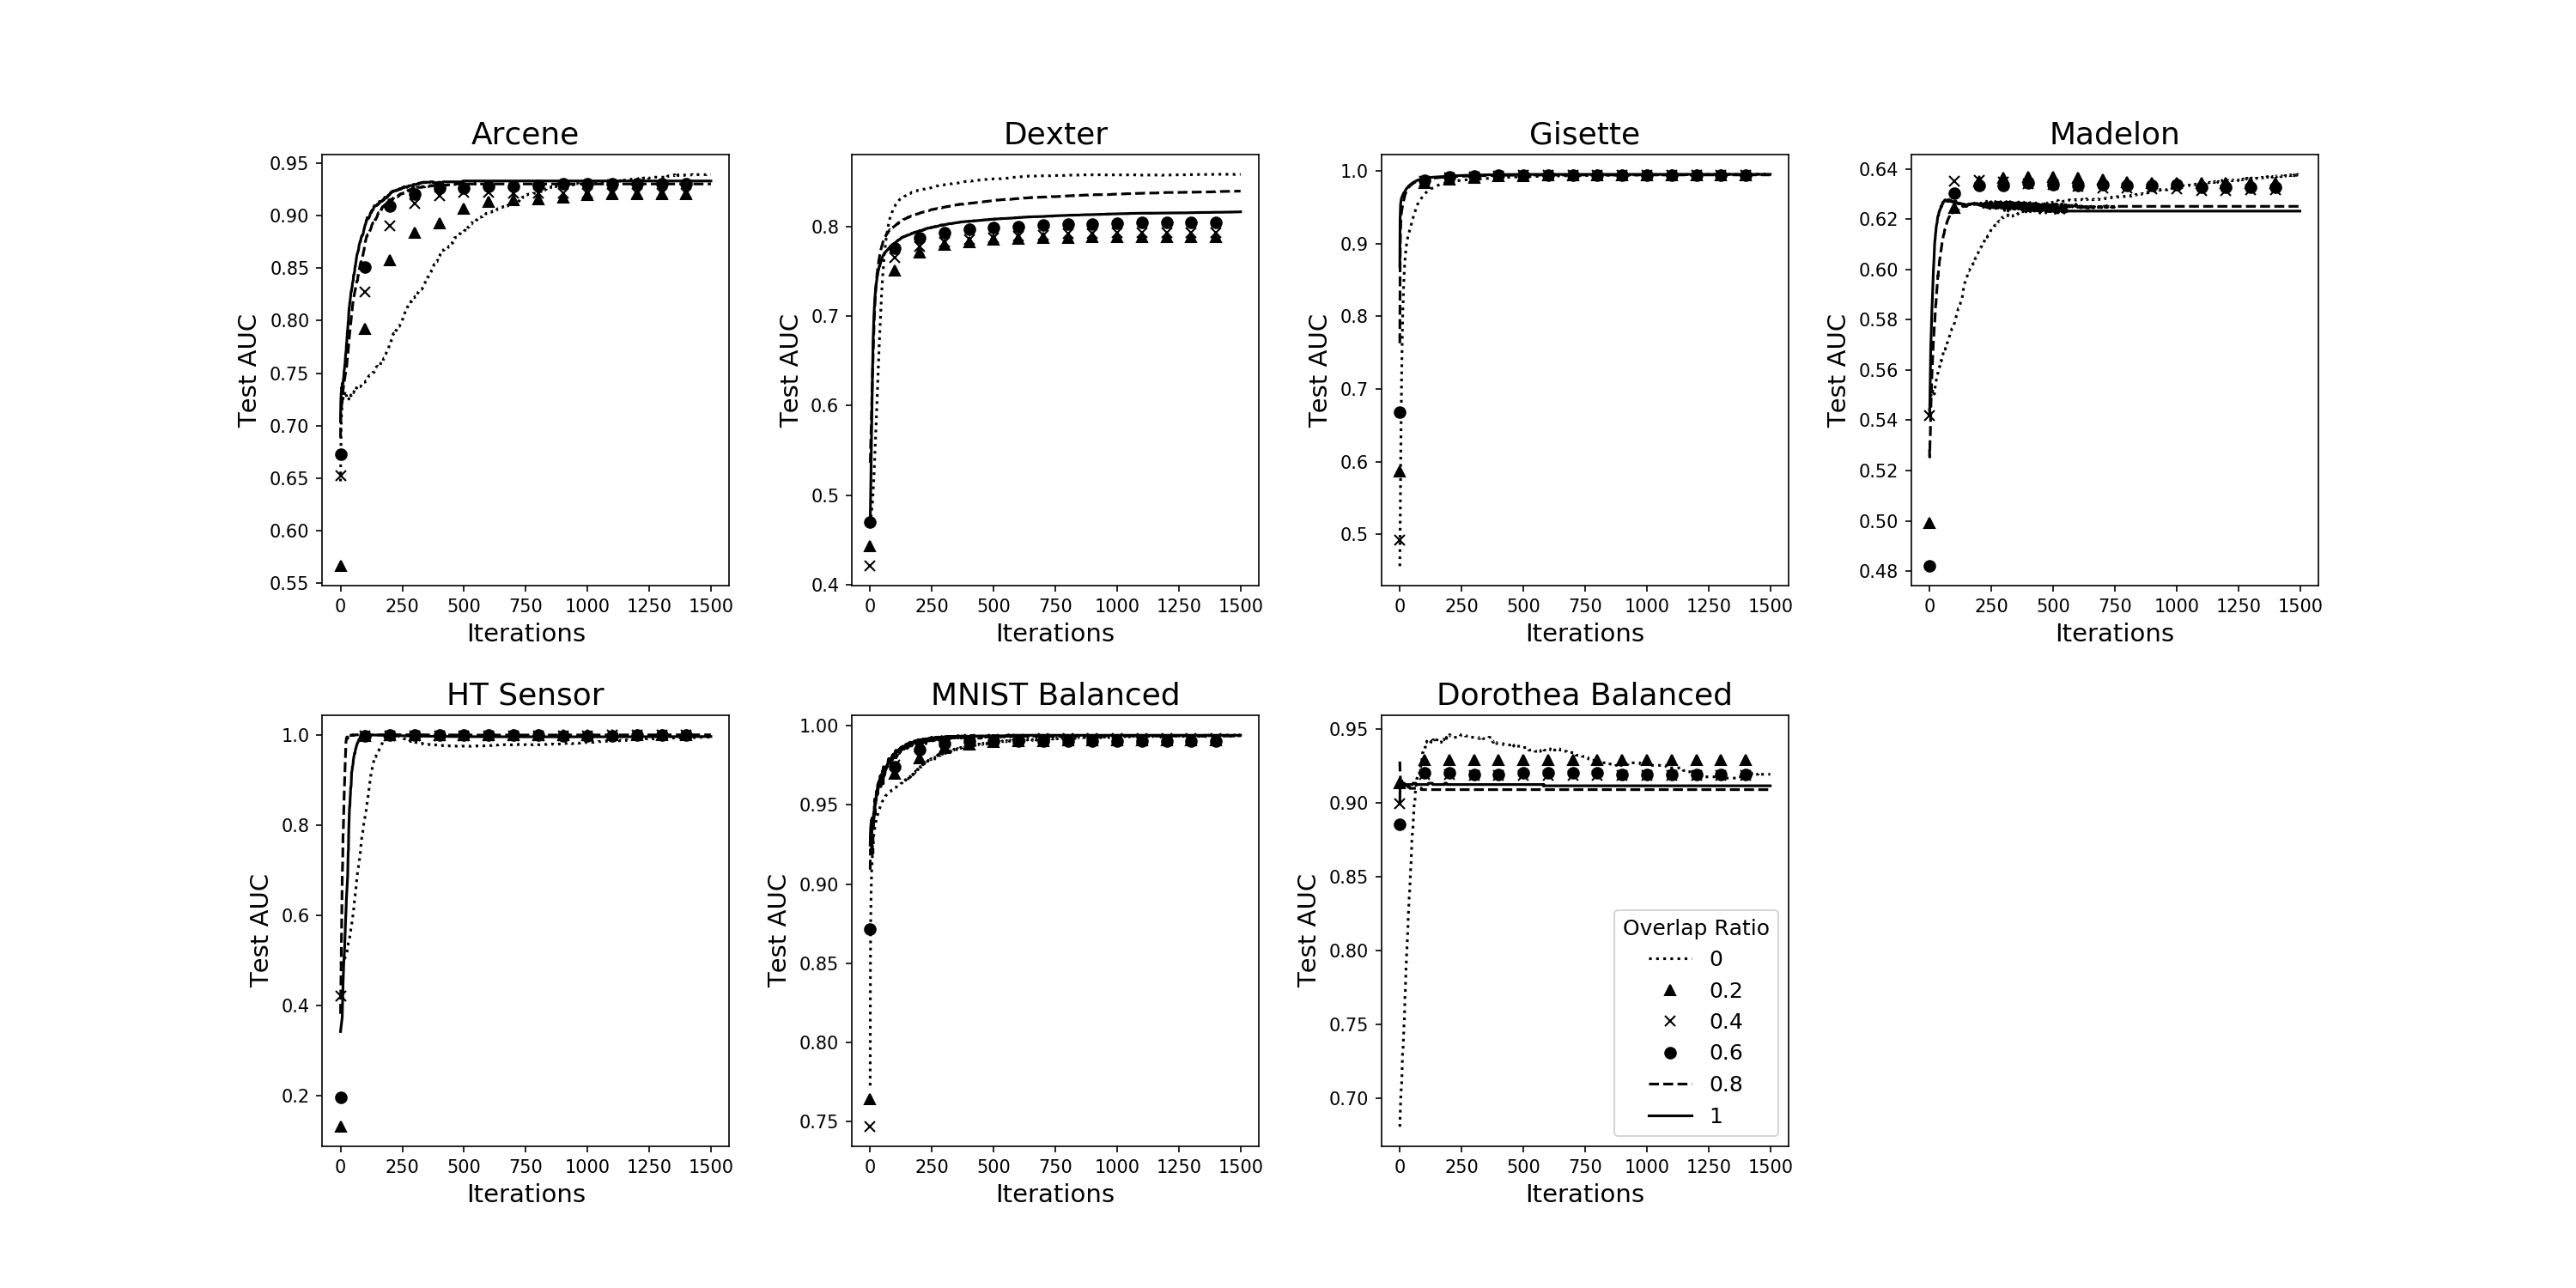

In [15]:
plottype = [':', '^', 'x', 'o', '--','-']

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.delaxes(ax8)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for idx, dataset in enumerate(datasets):
    overlap_aucs = []
    overlap_ratios = [0,0.2,0.4,0.6,0.8,1]
    for ratio, i in enumerate([13,3,4,5,6,7]):
        if i == 13:
            path = "{}/results/results_{}.csv".format(dataset, i)
        else:
            path = "{}/results_conv/results_{}.csv".format(dataset, i)
        df_temp = pd.read_csv(path).groupby(['iter']).agg(
            {'overall_test_auc': 'max'})
        df_temp = df_temp[df_temp.index < 1500]
        axes[idx].plot(df_temp.index, df_temp.overall_test_auc, plottype[ratio], label = overlap_ratios[ratio],
                 color='black', markevery=100)

    axes[idx].set_xlabel('Iterations', fontsize=14)
    axes[idx].set_ylabel('Test AUC', fontsize=14)

    axes[idx].set_title(dataset_names[idx], fontsize='xx-large')
    if idx == len(datasets)-1:
        axes[idx].legend(loc=4, fontsize='large', title='Overlap Ratio', title_fontsize='large')


pass

### MISC

In [ ]:
df_test[df_test.converged_flags == True].groupby(['node']).agg({'iter': 'min'})

In [ ]:
df_test[df_test.node == 0].test_loss.plot()

In [ ]:
t = df_test[(df_test.node == 0) & (df_test.converged_flags == False)]#.test_loss.plot()

In [ ]:
pd.np.mean(t[-5-2:-2].test_loss) - pd.np.mean(t[-5:].test_loss)

In [ ]:
pd.np.mean(t[-5:].test_loss)

In [ ]:
# f = df_test.groupby(['iter', 'overlap_ratio']).agg({'overall_train_auc': 'mean'}).reset_index()
df_test.pivot(index='iter', columns='node', values='test_loss').plot()


In [ ]:
df_test[-2000:].test_loss.plot()

In [ ]:
df_test.groupby(['node']).iter.min()

In [ ]:
df_0 = pd.read_csv("dexter/results/results_1.csv")[['iter', 'overall_test_auc', 'overall_train_auc']]
df_2 = pd.read_csv("dexter/results/results_3.csv")[['iter', 'overall_test_auc', 'overall_train_auc']]
df_4 = pd.read_csv("dexter/results/results_4.csv")[['iter', 'overall_test_auc', 'overall_train_auc']]
df_6 = pd.read_csv("dexter/results/results_5.csv")[['iter', 'overall_test_auc', 'overall_train_auc']]
df_8 = pd.read_csv("dexter/results/results_6.csv")[['iter', 'overall_test_auc', 'overall_train_auc']]
df_1 = pd.read_csv("dexter/results/results_7.csv")[['iter', 'overall_test_auc', 'overall_train_auc']]

df_0['overlap_ratio'] = 0
df_2['overlap_ratio'] = 0.2
df_4['overlap_ratio'] = 0.4
df_6['overlap_ratio'] = 0.6
df_8['overlap_ratio'] = 0.8
df_1['overlap_ratio'] = 1

dfs_dexter = pd.concat([df_0, df_2, df_4, df_6, df_8, df_1])

f = dfs_dexter.groupby(['iter', 'overlap_ratio']).agg({'overall_test_auc': 'mean'}).reset_index()
f.pivot(index='iter', columns='overlap_ratio', values='overall_test_auc').plot()


In [ ]:
dataset = 'arcene'
col = 'overall_test_auc'
df_0 = pd.read_csv("{}/results/results_1.csv".format(dataset))[['iter', 'overall_test_auc', 'overall_train_auc']]
df_2 = pd.read_csv("{}/results/results_3.csv".format(dataset))[['iter', 'overall_test_auc', 'overall_train_auc']]
df_4 = pd.read_csv("{}/results/results_4.csv".format(dataset))[['iter', 'overall_test_auc', 'overall_train_auc']]
df_6 = pd.read_csv("{}/results/results_5.csv".format(dataset))[['iter', 'overall_test_auc', 'overall_train_auc']]
df_8 = pd.read_csv("{}/results/results_6.csv".format(dataset))[['iter', 'overall_test_auc', 'overall_train_auc']]
df_1 = pd.read_csv("{}/results/results_7.csv".format(dataset))[['iter', 'overall_test_auc', 'overall_train_auc']]

df_0['overlap_ratio'] = 0
df_2['overlap_ratio'] = 0.2
df_4['overlap_ratio'] = 0.4
df_6['overlap_ratio'] = 0.6
df_8['overlap_ratio'] = 0.8
df_1['overlap_ratio'] = 1

dfs_dexter = pd.concat([df_0, df_2, df_4, df_6, df_8, df_1])

f = dfs_dexter.groupby(['iter', 'overlap_ratio']).agg({'overall_test_auc': 'mean'}).reset_index()
f.pivot(index='iter', columns='overlap_ratio', values='overall_test_auc').plot()


In [ ]:
dex = dfs_dexter.groupby(['overlap_ratio']).agg({'overall_test_auc': 'max'}).reset_index()
dex['dataset'] = 'dexter'

In [ ]:
mni = dfs_mnist.groupby(['overlap_ratio']).agg({'overall_test_auc': 'max'}).reset_index()
mni['dataset'] = 'mnist'

In [ ]:
dor = dfs_dorothea.groupby(['overlap_ratio']).agg({'overall_test_auc': 'max'}).reset_index()
dor['dataset'] = 'dorothea'

In [ ]:
alldf = pd.concat([mni, dex, dor])
alldf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")


# "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(iris, "species", var_name="measurement")
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="dataset", y="overall_test_auc", hue="overlap_ratio", size=9, linewidth=1,
               data=alldf)
plt.ylabel("Test AUC")
plt.xlabel("Dataset")

In [ ]:
f = dfs.groupby(['iter', 'overlap_ratio'])['overall_train_auc'].agg({'test_loss': 'mean'}).reset_index()
f.pivot(index='iter', columns='overlap_ratio', values='test_loss').plot()


In [ ]:
df = pd.read_csv("mnist_balanced/results/results_1.csv")

In [ ]:
pt = df.groupby(['iter', 'node']).agg({"overall_test_auc": "mean"}).reset_index()
pt.set_index('iter')['overall_test_auc'].plot()

In [ ]:
df.columns

In [ ]:
f = df.groupby(['iter', 'node'])['test_loss'].agg({'test_loss': 'mean'}).reset_index()

In [ ]:
f.pivot(index='iter', columns='node', values='test_loss').plot()

In [ ]:
df.groupby(['iter']).agg({"overall_test_auc": "mean"}).plot()

In [ ]:
df.groupby(['iter']).agg({"overall_test_auc": "mean"}).max()

In [ ]:
df = df.pivot(index='x', columns='color', values='y')

df.plot()